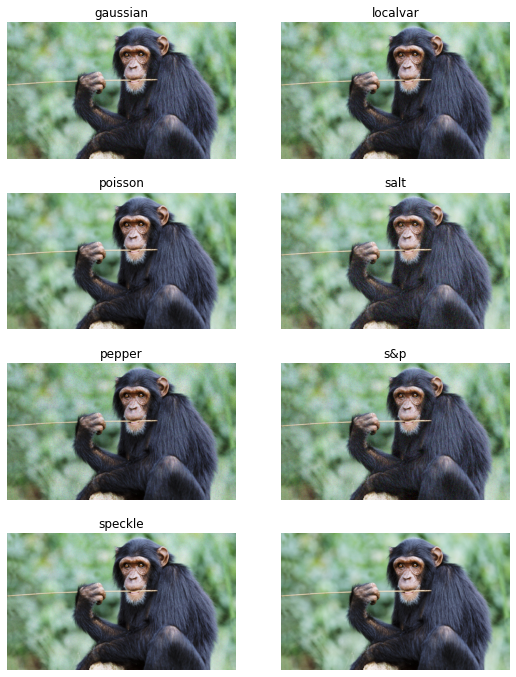

In [12]:
import skimage
from skimage.io import imread
import matplotlib.pyplot as plt
img_path="https://i.guim.co.uk/img/media/4ddba561156645952502f7241bd1a64abd0e48a3/0_1251_3712_2225/master/3712.jpg?width=1920&quality=85&auto=format&fit=max&s=1280341b186f8352416517fc997cd7da"
img = imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(9,12))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path="https://i.guim.co.uk/img/media/4ddba561156645952502f7241bd1a64abd0e48a3/0_1251_3712_2225/master/3712.jpg?width=1920&quality=85&auto=format&fit=max&s=1280341b186f8352416517fc997cd7da"

img = cv2.imread(img_path)[::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [11]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.normal(mean,sigma,(row,col, 1))
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
img_path="https://i.guim.co.uk/img/media/4ddba561156645952502f7241bd1a64abd0e48a3/0_1251_3712_2225/master/3712.jpg?width=1920&quality=85&auto=format&fit=max&s=1280341b186f8352416517fc997cd7da"
img = imread(img_path)/255.0
gaussian_noise_imgs = add_gaussian_noise(img)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


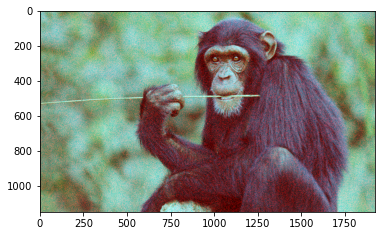

In [8]:
import skimage
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_path="https://i.guim.co.uk/img/media/4ddba561156645952502f7241bd1a64abd0e48a3/0_1251_3712_2225/master/3712.jpg?width=1920&quality=85&auto=format&fit=max&s=1280341b186f8352416517fc997cd7da"
img = imread(img_path)/255.0

def add_gauss_noise(img, bits):
	"""
	Add random gaussian noise to image

	:param img: input image
	:param bits: number of bits to represent a single color value

	:returns: image with noise
	"""
	MAX = bits
	noise = img.copy()
	cv2.randn(noise, 0, MAX//2)
	return img + noise 

bruh = add_gauss_noise(img, 2)
plt.imshow(bruh)